In [719]:
#importing dependencies
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings
# Sort feature importances in descending order
import matplotlib 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [720]:
#read in csv
april = pd.read_csv("dailyActivity_merged_april.csv")
may = pd.read_csv("dailyActivity_merged.csv")

In [721]:
#combine files
combined =pd.concat([april,may])
combined.drop( "ActivityDate",inplace = True,axis = 1)

In [608]:
#combining data
combined.head()
combined["Combined"] = combined.TotalSteps + combined.TotalDistance + combined.LoggedActivitiesDistance + combined.VeryActiveDistance \
    + combined.ModeratelyActiveDistance + combined.Calories + combined.LightActiveDistance

In [435]:
#printing quartiles
print("50 % for total steps is {}".format(combined.Combined.quantile(q=.25)))
print("50 % for total steps is {}".format(combined.Combined.quantile()))
print("75 % for total steps is {}".format(combined.Combined.quantile(q=.75)))

50 % for total steps is 5045.599999904633
50 % for total steps is 9385.800000190735
75 % for total steps is 13178.850000083447


In [436]:
def home_away(df):
    """Put fake home/away"""
    if df.Combined >= 9385:
        return 1
    else:
        return 0

In [437]:
combined["Home_Away"] = combined.apply(func = lambda x: home_away(x),axis = 1)

In [438]:
def generate_random_labels(df):
    """Generate rigged labels for classification algorithm to predict"""
    if df.Combined < 5045:
        return 0
    elif df.Combined >= 5045 and df.Combined  < 9385:
        return 1
    elif df.Combined >=9385 and df.Combined < 13178:
        return 2
    else:
        return 3
    

In [439]:
combined.target = combined.apply(func = lambda x: generate_random_labels(x),axis = 1)

In [440]:
#randomly replace targets
#add unpredictability
for num,value in enumerate(combined.target.values):
    if num % 5 == 0:
        print(combined.iloc[num,-1])
        combined.iloc[num,-1] = np.random.choice(5)
        print("new")
        print(combined.iloc[num,-1])

1.0
new
4.0
1.0
new
1.0
1.0
new
0.0
1.0
new
1.0
0.0
new
0.0
0.0
new
2.0
0.0
new
4.0
0.0
new
2.0
1.0
new
0.0
1.0
new
2.0
0.0
new
4.0
0.0
new
1.0
0.0
new
4.0
0.0
new
2.0
0.0
new
0.0
1.0
new
0.0
1.0
new
0.0
0.0
new
2.0
0.0
new
2.0
0.0
new
4.0
0.0
new
3.0
0.0
new
0.0
0.0
new
1.0
1.0
new
0.0
1.0
new
1.0
1.0
new
1.0
0.0
new
2.0
0.0
new
1.0
0.0
new
0.0
0.0
new
4.0
0.0
new
0.0
1.0
new
3.0
1.0
new
2.0
0.0
new
3.0
1.0
new
3.0
1.0
new
1.0
1.0
new
4.0
0.0
new
1.0
1.0
new
0.0
0.0
new
3.0
0.0
new
0.0
0.0
new
4.0
0.0
new
1.0
0.0
new
1.0
0.0
new
1.0
0.0
new
0.0
1.0
new
2.0
1.0
new
1.0
0.0
new
4.0
0.0
new
2.0
0.0
new
3.0
0.0
new
4.0
0.0
new
2.0
0.0
new
4.0
1.0
new
3.0
0.0
new
0.0
1.0
new
2.0
1.0
new
0.0
0.0
new
2.0
1.0
new
2.0
0.0
new
2.0
1.0
new
1.0
0.0
new
3.0
1.0
new
4.0
0.0
new
1.0
1.0
new
3.0
0.0
new
3.0
0.0
new
0.0
0.0
new
2.0
0.0
new
2.0
0.0
new
3.0
1.0
new
2.0
1.0
new
3.0
0.0
new
4.0
1.0
new
2.0
1.0
new
3.0
0.0
new
1.0
1.0
new
0.0
1.0
new
0.0
1.0
new
1.0
0.0
new
2.0
0.0
new
3.0
0.0
new
0.0
1.0


In [441]:
output_dict = {3: "Healed", 2:"Stage 1 HS", 1: "Stage 2 HS", 0: " Stage 3 HS"} #what model corresponds to
home_away = {0: "Stayed Home", 1: "Left House"}

In [445]:
#prepare X and y 
X = combined.iloc[:, 1:-1]
print(X.shape)
print(list(X))
st = StandardScaler()
X_ = st.fit_transform(X)
print(X_.shape)

(1397, 14)
['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Combined']
(1397, 14)


In [446]:
y = combined.target

In [447]:
log_ = LogisticRegression(multi_class = "multinomial",solver='lbfgs',) #define logistic regression

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y) #train test split

In [449]:
log_.fit(X_train,y_train) #log fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [450]:
pred = log_.predict(X_test) #predict

In [451]:
print(classification_report(y_test,pred))#classification report

             precision    recall  f1-score   support

          0       0.88      0.87      0.88        78
          1       0.74      0.64      0.69        84
          2       0.66      0.66      0.66        93
          3       0.79      0.89      0.84        95

avg / total       0.76      0.77      0.76       350



In [452]:
clf = RandomForestClassifier() #random forrest

In [453]:
clf.fit(X_train,y_train) #fit

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [454]:
pred_clf = clf.predict(X_test)#predict


In [455]:
print(classification_report(y_test,pred_clf))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        78
          1       0.98      0.94      0.96        84
          2       0.95      0.98      0.96        93
          3       1.00      0.98      0.99        95

avg / total       0.97      0.97      0.97       350



## cross - validation

In [460]:
def custom_cv_5folds(X):
    """Defining 5 fold iterator"""
    n = X.shape[0]
    i = 1
    while i <= 5:
        idx = np.arange(n * (i - 1) / 5, n * i / 5, dtype=int)
        yield idx, idx
        i += 1

In [467]:
custom_cv = custom_cv_5folds(X)

In [468]:
log_ = LogisticRegression(multi_class = "multinomial",solver='lbfgs',)

In [469]:
cross_val_score(log_, X, y, cv=custom_cv) #cross val score

array([0.76428571, 0.78571429, 0.77857143, 0.78214286, 0.79285714])

# App Response Model

In [562]:
app_df = pd.DataFrame() #raw df

In [563]:
import random
#creating dataframe that represents each question that Alexa asks plus additional data from journal entry
columns_ = ["Itchy","Embarassed","Interfered","Clothes","Social","Sport","Partner","Sexual",
          "Messy","Drainage","Odor","Swelling","Sentiment","Flesch-Kincaid","Length_of_response"]
for col in columns_[:-3]:
    empty = []
    i = 0
    random_ = random.uniform(3,5)
    num = random.uniform(1,5)
    while num == random_:
        num = random.uniform(1,5)
    while i < 1397:
        if i!=0 and i % num == 0:
            empty.append(0)
        elif i % random_ ==0:
            empty.append(np.random.choice(4))
        elif i >=0 and i < 350:
            empty.append(1)
        elif i >=350 and i < 700:
            empty.append(2)
        elif i>=700 and i <=1050:
            empty.append(3)
        else:
            empty.append(4)
        i+=1
    app_df[col] = empty

In [564]:
sentiment = []
flesch = []
#insert random data 
for num,value in enumerate(app_df.Itchy.values):
    if value in [0,1,2]:
        flesch.append(random.uniform(5,20))
        sentiment.append(random.uniform(0,1))
    else:
        flesch.append(random.uniform(0,15))
        sentiment.append(random.uniform(-1,0))
    

In [565]:
app_df["Combined_"] = app_df.sum(axis = 1) #sum

In [566]:
app_df["Sentiment"]  = sentiment
app_df["Flesch"] = flesch

In [567]:
np.mean(app_df.Combined_)
print("25 % for total steps is {}".format(app_df.Combined_.quantile(q=.25)))
print("50 % for total steps is {}".format(app_df.Combined_.quantile()))
print("75 % for total steps is {}".format(app_df.Combined_.quantile(q=.75)))

25 % for total steps is 21.0
50 % for total steps is 24.0
75 % for total steps is 36.0


In [568]:
def generate_random_labels(df):
    """Generate rigged labels for classification algorithm to predict"""
  
    if df.Combined_ <= 12 :
        return 3
    elif df.Combined_ >12 and df.Combined_ <=24:
        return 2
    elif df.Combined_ >24 and df.Combined_ <=36:
        return 1
    else:
        return 0

In [569]:
app_df.Combined_.value_counts()

36    351
24    350
12    349
48    346
21      1
Name: Combined_, dtype: int64

In [570]:
app_df["target"] = app_df.apply(func = lambda x : generate_random_labels(x), axis = 1)

In [571]:
app_df = app_df.sample(frac=1).reset_index(drop=True) #shuffle

In [572]:
#X and y 
X = app_df.iloc[:, :-1]
print(X.shape)
print(list(X))
st = StandardScaler()
X_ = st.fit_transform(X)
print(X_.shape)

(1397, 15)
['Itchy', 'Embarassed', 'Interfered', 'Clothes', 'Social', 'Sport', 'Partner', 'Sexual', 'Messy', 'Drainage', 'Odor', 'Swelling', 'Combined_', 'Sentiment', 'Flesch']
(1397, 15)


In [573]:
y = app_df.target #target

In [574]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [601]:
Clf_text = RandomForestClassifier()
Clf_text.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [602]:
pred_text = Clf_text.predict(X_test)

In [603]:
print(classification_report(y_test,pred_text))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        81
          1       1.00      1.00      1.00        97
          2       1.00      1.00      1.00        83
          3       1.00      1.00      1.00        89

avg / total       1.00      1.00      1.00       350



In [687]:
importances = Clf_text.feature_importances_

In [639]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

matplotlib.rc('font', **font)
# Sort feature importances in descending order
plt.style.use("ggplot")

In [690]:
ex = pd.DataFrame()
ex["names"] = ['Itchy', 'Embarassed', 'Interfered', 'Clothes', 'Social', 'Sport', 'Partner', 'Sexual', 'Messy', 'Drainage', 'Odor', 'Swelling', 'Combined_', 'Sentiment', 'Flesch']
ex["importance"] = importances

In [701]:
ex = ex.sort_values(by = "importance",  ascending = False)

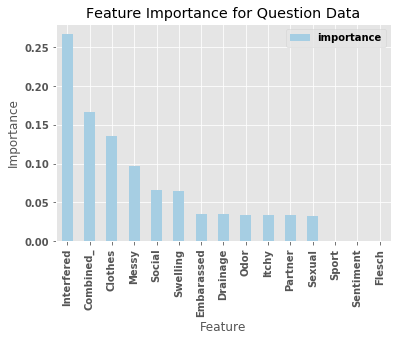

In [718]:
plt.figure(figsize = (30,10))

#which features are the most important?
plt.tight_layout()
ax = ex.plot(kind = "bar",colormap = "Paired",title = "Feature Importance for Question Data" )
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
ax.set_xticklabels(ex["names"])
plt.savefig("Feature_Importance.png",bbox_inches = 'tight')

In [578]:
gauss = LogisticRegression( multi_class='multinomial',solver = 'lbfgs')

In [593]:
gauss = LogisticRegression()

In [594]:
gauss.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [595]:
print(classification_report(y_test,gauss.predict(X_test)))

             precision    recall  f1-score   support

          0       0.86      1.00      0.93        81
          1       0.95      0.78      0.86        97
          2       0.91      0.95      0.93        83
          3       1.00      1.00      1.00        89

avg / total       0.93      0.93      0.93       350



In [597]:
custom_cv = custom_cv_5folds(X)
Clf_text = LogisticRegression(multi_class = "multinomial",solver='lbfgs',)

In [598]:
cross_val_score(Clf_text, X, y, cv=custom_cv)

array([0.96428571, 0.96428571, 0.97857143, 0.97857143, 0.98928571])

In [724]:
i = 0
num = 10
li = []
while i < 15:
    num = random.randint(num - 2,num+1)
    if num < 0:
        num = 0
    if num == 11:
        num = 10
    li.append(num)
    i+=1
    

In [726]:
x = pd.DataFrame()
x["Weeks"] = ["Week {}".format(num+1) for num in range(15)]
x["Odor"] = li

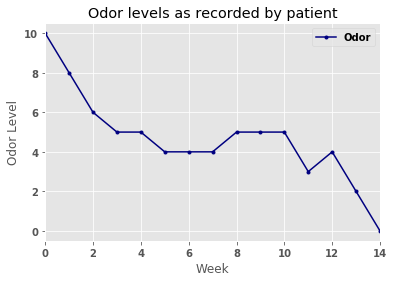

In [727]:
ax = x.plot(colormap = "jet", marker = ".",title = "Odor levels as recorded by patient")
ax.set_xlabel("Week")
ax.set_ylabel("Odor Level")
plt.savefig("Odor over time.png")